# A Large Scale Fish Classification with CNN

<b>Balık Sınıflandırma</b><br>
Bu projede 9 farklı balık resmi ile geliştirilen model ile nesne tanıma uygulaması geliştiriyoruz.
<br> Modelde kullanılan balık çeşitleri:
* Black Sea Sprat
* Gilt-Head Bream
* Hourse Mackerel
* Red Mullet
* Red Sea Bream
* Sea Bass
* Shrimp
* Striped Red Mullet
* Trout

Bu projede kullanılan verilere [buradan](https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset) ulaşılabilir.

In [1]:
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
img_path="Fish_Dataset/"
labels = [item for item in os.listdir(img_path) if os.path.isdir(os.path.join(img_path, item))]
labels

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [3]:
def set_df(dir):
    img_list=[]
    label_list=[]
    for label in labels:
        i=0
        for img_file in os.listdir(dir+label+"/"+label):
            i+=1
            img_list.append(dir+label+"/"+label+"/"+img_file)
            label_list.append(label)
    df=pd.DataFrame({"img":img_list, "label":label_list})
    return df

In [4]:
df=set_df("Fish_Dataset/")

In [5]:
df["label"].value_counts()

label
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64

In [6]:
df.sample(10)

,img,label
6208,Fish_Dataset/Shrimp/Shrimp/00209.png,Shrimp
2834,Fish_Dataset/Hourse Mackerel/Hourse Mackerel/0...,Hourse Mackerel
8104,Fish_Dataset/Trout/Trout/00105.png,Trout
7431,Fish_Dataset/Striped Red Mullet/Striped Red Mu...,Striped Red Mullet
2716,Fish_Dataset/Hourse Mackerel/Hourse Mackerel/0...,Hourse Mackerel
4647,Fish_Dataset/Red Sea Bream/Red Sea Bream/00648...,Red Sea Bream
3620,Fish_Dataset/Red Mullet/Red Mullet/00621.png,Red Mullet
2744,Fish_Dataset/Hourse Mackerel/Hourse Mackerel/0...,Hourse Mackerel
6817,Fish_Dataset/Shrimp/Shrimp/00818.png,Shrimp
2750,Fish_Dataset/Hourse Mackerel/Hourse Mackerel/0...,Hourse Mackerel


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["encode_label"] = label_encoder.fit_transform(df["label"])

In [8]:
df.sample(10)

,img,label,encode_label
8106,Fish_Dataset/Trout/Trout/00107.png,Trout,8
1293,Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/0...,Gilt-Head Bream,1
1554,Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/0...,Gilt-Head Bream,1
5758,Fish_Dataset/Sea Bass/Sea Bass/00759.png,Sea Bass,5
6066,Fish_Dataset/Shrimp/Shrimp/00067.png,Shrimp,6
648,Fish_Dataset/Black Sea Sprat/Black Sea Sprat/0...,Black Sea Sprat,0
848,Fish_Dataset/Black Sea Sprat/Black Sea Sprat/0...,Black Sea Sprat,0
82,Fish_Dataset/Black Sea Sprat/Black Sea Sprat/0...,Black Sea Sprat,0
1589,Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/0...,Gilt-Head Bream,1
6388,Fish_Dataset/Shrimp/Shrimp/00389.png,Shrimp,6


In [9]:
df["img"][0]

'Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png'

In [10]:
image=cv2.imread(str(df["img"][0]))
image.shape

(445, 590, 3)

In [67]:
size=128
x=[]
for imge in df["img"]:
    img=cv2.imread(str(imge))
    #print(imge, img.shape)
    img=cv2.resize(img, (size,size), cv2.INTER_LINEAR)
    img=img/255.0 
    x.append(img)

In [68]:
x=np.array(x)

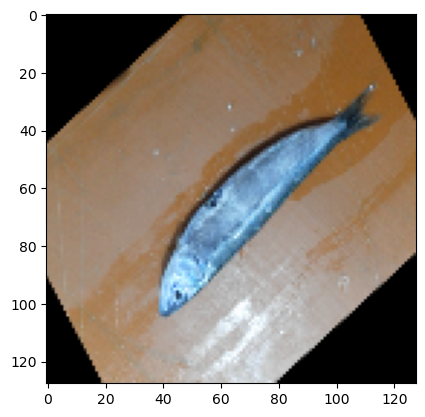

In [69]:
plt.imshow(x[0])

In [70]:
y=df['encode_label']

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train.shape, x_test.shape

((7200, 128, 128, 3), (1800, 128, 128, 3))

## Modelleme

In [72]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape

In [73]:
classN=len(labels)

model=Sequential()
model.add(Input(shape=(size,size,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(classN, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [74]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=30, verbose=1)

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 44s 183ms/step - accuracy: 0.4170 - loss: 1.9338 - val_accuracy: 0.8394 - val_loss: 0.4960
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 179ms/step - accuracy: 0.8803 - loss: 0.3473 - val_accuracy: 0.9089 - val_loss: 0.2488
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 179ms/step - accuracy: 0.9537 - loss: 0.1428 - val_accuracy: 0.9333 - val_loss: 0.1970
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 179ms/step - accuracy: 0.9719 - loss: 0.0887 - val_accuracy: 0.9161 - val_loss: 0.2540
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 179ms/step - accuracy: 0.9846 - loss: 0.0431 - val_accuracy: 0.9194 - val_loss: 0.2867
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 178ms/step - accuracy: 0.9805 - loss: 0.0663 - val_accuracy: 0.9422 - val_loss: 0.1794
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 179ms/step - accuracy: 0.9935 - loss: 0.0212 - val_accuracy: 0.9394 - val_loss: 0.2366
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 178ms/step - accuracy: 0.9858 - loss: 0

In [75]:
loss, accuracy = model.evaluate(x_test, y_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9792 - loss: 0.1018


In [76]:
accuracy

0.9850000143051147

In [77]:
import matplotlib.pyplot as plt

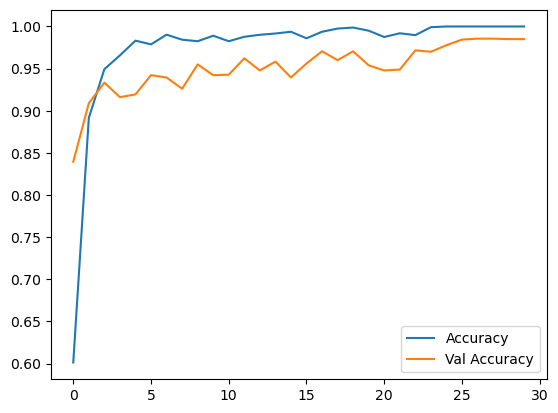

In [78]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()

In [79]:
pred = model.predict(x_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


In [80]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [81]:
confusion_matrix(y_test, np.argmax(pred, axis=1))

array([[194,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 205,   0,   2,   0,   1,   1,   0,   2],
       [  0,   0, 179,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 191,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 201,   1,   0,   0,   1],
       [  2,   0,   0,   0,   0, 203,   0,   2,   0],
       [  0,   0,   0,   3,   0,   0, 206,   0,   0],
       [  1,   0,   0,   0,   0,   4,   1, 198,   0],
       [  0,   0,   1,   0,   2,   2,   0,   0, 196]], dtype=int64)

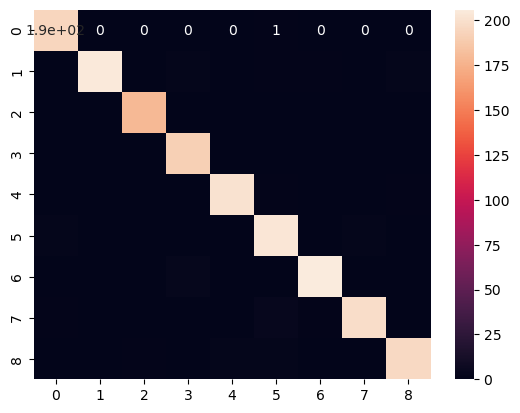

In [82]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, np.argmax(pred, axis=1)), annot=True);

In [83]:
print(classification_report(y_test, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       195
           1       1.00      0.97      0.99       211
           2       0.99      1.00      1.00       179
           3       0.97      1.00      0.99       191
           4       0.99      0.99      0.99       203
           5       0.96      0.98      0.97       207
           6       0.99      0.99      0.99       209
           7       0.99      0.97      0.98       204
           8       0.98      0.98      0.98       201

    accuracy                           0.98      1800
   macro avg       0.99      0.99      0.99      1800
weighted avg       0.99      0.98      0.99      1800



In [84]:
model.save('fish_model.h5')

In [97]:
imge=cv2.imread("alabalık.jpg")
imge.shape

(628, 1200, 3)

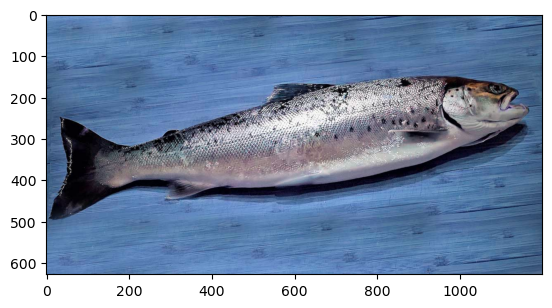

In [98]:
plt.imshow(imge)

In [99]:
imge=cv2.resize(imge, (size,size))
imge=imge/255.0

In [100]:
imge=np.array(imge)

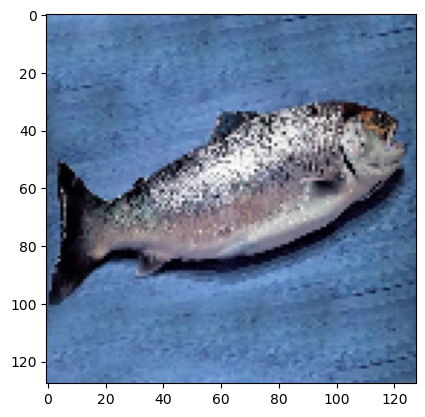

In [101]:
plt.imshow(imge)

In [105]:
imge=np.expand_dims(imge, axis=0)

In [106]:
t=model.predict(imge)
t

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[1.0302197e-13, 9.9880397e-01, 5.5419827e-18, 2.0080887e-10,
        3.1425108e-12, 1.3358151e-05, 1.1115995e-26, 2.1420939e-17,
        1.1826893e-03]], dtype=float32)

In [104]:
labels[np.argmax(t)]

'Trout'

## Sonuç

Balık resimleri sınıflandırma amacıyla derin öğrenme modeli geliştirildi.